In [1]:
## Pre-setting
# automatically adjust the width of the notebook code cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# if one module is changed, this line will automatically reload that module
%load_ext autoreload
%autoreload 2
# display the figure in the notebook
%matplotlib inline
# To change the font size in acrobat
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## read data

In [3]:
import os
import sys

data_folder = os.path.abspath(os.path.join(os.pardir, 'data'))
data_file = 'employee_retention_data.csv'
data_folder_file = os.path.join(data_folder, data_file)

In [4]:
raw_data_df = pd.read_csv(data_folder_file)
raw_data_df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,3/24/14,10/30/15
1,825355.0,7,marketing,20,183000.0,4/29/13,4/4/14
2,927315.0,4,marketing,14,101000.0,10/13/14,NaN
3,662910.0,7,customer_service,20,115000.0,5/14/12,6/7/13
4,256971.0,2,data_science,23,276000.0,10/17/11,8/22/14


In [5]:
raw_data_df.quit_date.isnull().sum() / (len(raw_data_df.quit_date))

0.453080722208728

In [6]:
# pd.to_datetime(raw_data_df.join_date, format="%m/%d/%Y")
raw_data_df.join_date = pd.to_datetime(raw_data_df.join_date, infer_datetime_format=1)
raw_data_df.quit_date = pd.to_datetime(raw_data_df.quit_date, infer_datetime_format=1)

In [7]:
raw_data_df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [8]:
raw_data_df.shape

(24702, 7)

## play with data

In [9]:
tmp_array = (raw_data_df.employee_id.unique())
len(tmp_array), max(tmp_array), min(tmp_array),

(24702, 999969.0, 36.0)

In [10]:
len(raw_data_df.company_id.unique())

12

In [11]:
len(raw_data_df.dept.unique())

6

In [12]:
tmp_array = (raw_data_df.seniority.unique())
len(tmp_array), max(tmp_array), min(tmp_array),

(31, 99, 1)

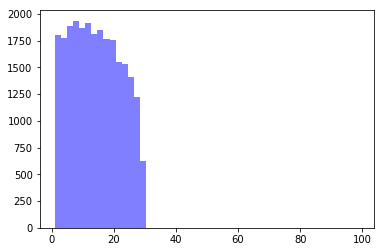

In [13]:
tmp_array =  raw_data_df.seniority

num_bins = 50
n, bins, patches = plt.hist(tmp_array, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [14]:

tmp_array_join_date = (raw_data_df.join_date.unique())
len(tmp_array_join_date), max(tmp_array_join_date), min(tmp_array_join_date),

(995,
 numpy.datetime64('2015-12-10T00:00:00.000000000'),
 numpy.datetime64('2011-01-24T00:00:00.000000000'))

In [15]:
raw_data_df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [16]:
raw_data_df['join_day'] = (raw_data_df.join_date - min(tmp_array_join_date)).astype('timedelta64[D]') 

raw_data_df['quit_day'] = (raw_data_df.quit_date - min(tmp_array_join_date)).astype('timedelta64[D]')


# raw_data_df['stay_days'] = raw_data_df['quit_days'] - raw_data_df['join_days'] 

In [17]:
# raw_data_df.quit_day

In [18]:
raw_data_df['if_quit'] = -raw_data_df.quit_date.isnull()

In [19]:
raw_data_df['last_day'] = raw_data_df.quit_day

In [20]:
raw_data_df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_day,quit_day,if_quit,last_day
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1155.0,1740.0,True,1740.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,826.0,1166.0,True,1166.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,1358.0,NaN,False,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,476.0,865.0,True,865.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,266.0,1306.0,True,1306.0


In [21]:
last_day = (np.datetime64('2015-12-13')-min(tmp_array_join_date)).astype('timedelta64[D]').astype('float')

In [22]:
na_dict = {'last_day':last_day}
raw_data_df=raw_data_df.fillna(na_dict)

In [23]:
raw_data_df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_day,quit_day,if_quit,last_day
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1155.0,1740.0,True,1740.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,826.0,1166.0,True,1166.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,1358.0,NaN,False,1784.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,476.0,865.0,True,865.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,266.0,1306.0,True,1306.0


In [24]:
raw_data_df['stay_days'] = raw_data_df.last_day - raw_data_df.join_day

In [25]:
tmp_array = (raw_data_df.stay_days.unique())
len(tmp_array), max(tmp_array), min(tmp_array),

(1353, 1777.0, 3.0)

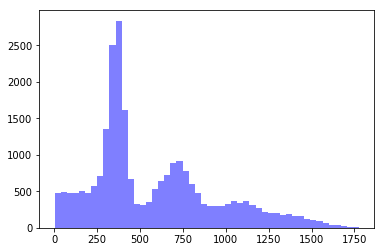

In [26]:
raw_data_df

tmp_array =  raw_data_df.stay_days

num_bins = 50
n, bins, patches = plt.hist(tmp_array, num_bins, facecolor='blue', alpha=0.5)
plt.show()

## split into 2 groups: quit & not_quit

In [27]:
raw_data_df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_day,quit_day,if_quit,last_day,stay_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1155.0,1740.0,True,1740.0,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,826.0,1166.0,True,1166.0,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,1358.0,NaN,False,1784.0,426.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,476.0,865.0,True,865.0,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,266.0,1306.0,True,1306.0,1040.0


In [28]:
raw_data_df_save = raw_data_df.copy(deep=True)

In [29]:
raw_data_df = raw_data_df_save.drop(['quit_day'], axis=1)
raw_data_df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_day,if_quit,last_day,stay_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1155.0,True,1740.0,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,826.0,True,1166.0,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,1358.0,False,1784.0,426.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,476.0,True,865.0,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,266.0,True,1306.0,1040.0


In [30]:
quit_raw_data_df = raw_data_df[raw_data_df.if_quit == 1]
no_quit_raw_data_df = raw_data_df[raw_data_df.if_quit == 0]

In [31]:
raw_data_df.shape, quit_raw_data_df.shape, no_quit_raw_data_df.shape

((24702, 11), (13510, 11), (11192, 11))

### Compare quit vs no_quit

In [32]:
quit_raw_data_df.stay_days.mean(),  no_quit_raw_data_df.stay_days.mean()

(613.4868245743893, 527.0392244460329)

In [33]:
quit_company_mean = quit_raw_data_df.groupby(['company_id'])['stay_days'].mean().values
no_quit_company_mean = no_quit_raw_data_df.groupby(['company_id'])['stay_days'].mean().values
company_id = quit_raw_data_df.groupby(['company_id'])['stay_days'].mean().index.values

## only use quit_df: try to predict the stay_days

In [34]:
quit_raw_data_df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_day,if_quit,last_day,stay_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1155.0,True,1740.0,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,826.0,True,1166.0,340.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,476.0,True,865.0,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,266.0,True,1306.0,1040.0
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,371.0,True,949.0,578.0


In [35]:
drop_column_list = [

    'employee_id', 'join_date', 'join_date', 'quit_date',
    'if_quit', 'last_day', '', '',
    '', '', '', '',
]

drop_column_list = [i for i in drop_column_list if i is not '']

quit_raw_data_df = quit_raw_data_df.drop(drop_column_list, axis=1)

In [36]:
quit_raw_data_df.head()

,company_id,dept,seniority,salary,join_day,stay_days
0,7,customer_service,28,89000.0,1155.0,585.0
1,7,marketing,20,183000.0,826.0,340.0
3,7,customer_service,20,115000.0,476.0,389.0
4,2,data_science,23,276000.0,266.0,1040.0
5,4,data_science,14,165000.0,371.0,578.0


In [37]:
categorical=['company_id','dept']
quit_raw_data_dummy_df=pd.get_dummies(quit_raw_data_df, columns=categorical)

In [38]:
quit_raw_data_dummy_df.head()

,seniority,salary,join_day,stay_days,company_id_1,company_id_2,company_id_3,company_id_4,company_id_5,company_id_6,...,company_id_9,company_id_10,company_id_11,company_id_12,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,28,89000.0,1155.0,585.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,20,183000.0,826.0,340.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,20,115000.0,476.0,389.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,23,276000.0,266.0,1040.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,14,165000.0,371.0,578.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


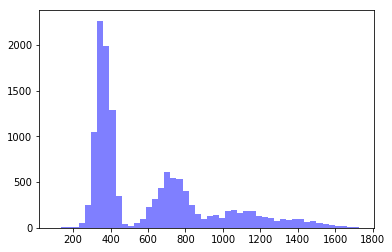

In [39]:
tmp_array =  quit_raw_data_dummy_df.stay_days.values
num_bins = 50
n, bins, patches = plt.hist(tmp_array, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [40]:
tmp_quit_raw_data_dummy_df = quit_raw_data_dummy_df[quit_raw_data_dummy_df.stay_days > 500]

In [41]:
tmp_quit_raw_data_dummy_df.shape

(6168, 22)

In [42]:
# Select only numeric data and impute missing values as 0
numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
quit_raw_data_x=tmp_quit_raw_data_dummy_df.select_dtypes(include=numerics).drop(['stay_days'],axis=1).fillna(0).values
# quit_raw_data_y= np.log(tmp_quit_raw_data_dummy_df['stay_days'].values)
quit_raw_data_y= (tmp_quit_raw_data_dummy_df['stay_days'].values)


In [48]:
quit_raw_data_x.shape, quit_raw_data_y.shape

((6168, 21), (6168,))

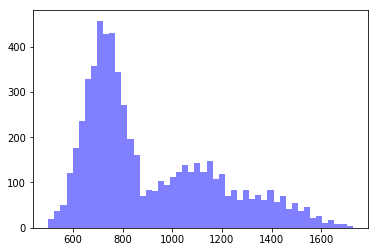

In [44]:


tmp_array =  tmp_quit_raw_data_dummy_df.stay_days.values

num_bins = 50
n, bins, patches = plt.hist(tmp_array, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [45]:
chicago_fair_x = quit_raw_data_x
chicago_fair_y = quit_raw_data_y

In [46]:
#random forest

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

cv_groups = KFold(n_splits=5, shuffle=True, random_state=0)

regr_cv_rf = RandomForestRegressor(random_state = 0, n_estimators = 100)

r_2_test_list = []
r_2_train_list = []


for train_index, test_index in cv_groups.split(chicago_fair_x):
    
    # Train the model using the training sets
    regr_cv_rf.fit(chicago_fair_x[train_index], chicago_fair_y[train_index])
    
    # Make predictions using the testing set
    pred_cv_rf_test = regr_cv_rf.predict(chicago_fair_x[test_index])
    
    # Make predictions using the testing set
    pred_cv_rf_train = regr_cv_rf.predict(chicago_fair_x[train_index])
     
    r_2_test = r2_score(chicago_fair_y[test_index], pred_cv_rf_test)
    r_2_test_list += [r_2_test]
    
    r_2_train = r2_score(chicago_fair_y[train_index], pred_cv_rf_train)
    r_2_train_list += [r_2_train]

    print(r_2_test, r_2_train)
    
np.mean(r_2_test_list), np.mean(r_2_train_list)

0.10678792463002362 0.8768731527244779
0.09451203063617564 0.8788859769801973
0.10952087205394989 0.8763783989853429
0.1254648115312006 0.8747892316469646
0.16672615362093368 0.8732542358000932


(0.12060235849445669, 0.8760361992274153)

### test

In [47]:
1

1